# Fransfontein Subsidence Modeling

Using a subsidence model (wernicke/mckenzie style), let's predict the amount of Marinoan subsidence along Fransfontein ridge.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
yl = 100e3 # thickness of pre-rift lithosphere
rho_ms = 3300 # density of manle at 1300C
alpha_v = 3.28e-5 # volumetric coefficient of thermal expansion
Tm = 1300 # temperature of mantle at base of lithosphere
rho_s = 2500 # density of sedeiments
kappa = 1e-6 # thermal diffusivity

yr2sec = 60*60*24*365.25

In [5]:
tau = yl**2/(np.pi**2 * kappa)
E0 = (4*yl*rho_ms*alpha_v*Tm)/(np.pi**2*(rho_ms-rho_s))

In [6]:
def thermsub(t, beta):
    return E0*beta/np.pi*np.sin(np.pi/beta)*(1-np.exp(-t/tau))

## Model 1

Let's say:
- rifting stopped after 660 Ma but before the Marinoan
- Ghaub starts at 640 (5 My after end of rifting)
- Ghaub lasts 4 My

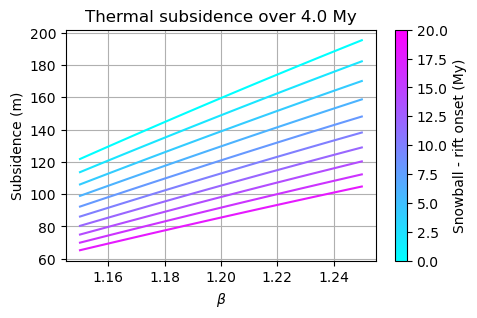

In [10]:
n_delays = 10
delays = np.linspace(0e6 * yr2sec, 20e6 * yr2sec, n_delays)
dur = 4e6 * yr2sec

beta = np.linspace(1.15, 1.25, 50)

c = plt.get_cmap('cool')
fig = plt.figure(figsize=(5, 3))
ax = plt.axes()

for ii, delay in enumerate(delays):
    mod1_subs = thermsub((delay+dur), beta) - thermsub(delay, beta)
    plt.plot(beta, mod1_subs, color=c(ii/n_delays))

ax.set_xlabel(r'$\beta$')
ax.set_ylabel('Subsidence (m)')
ax.set_title(f'Thermal subsidence over {dur/yr2sec/1e6} My')
fig.colorbar(mpl.cm.ScalarMappable(norm=plt.Normalize(np.min(delays)/yr2sec/1e6, 
                                                      np.max(delays)/yr2sec/1e6), cmap=c), 
             ax=ax,
             label='Snowball - rift onset (My)')

plt.grid()

plt.savefig(f'figures/Fransfontein_marinoan_subsidence_{dur/yr2sec/1e6}-My.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.savefig(f'figures/Fransfontein_marinoan_subsidence_{dur/yr2sec/1e6}-My.png', format='png', dpi=600, bbox_inches='tight')

plt.show()

## Model 2

Let's say:
- rifting stopped before Ghaub but after Chuos
- Ghaub starts at 650 (5 My after end of rifting)
- Ghaub lasts 15 My

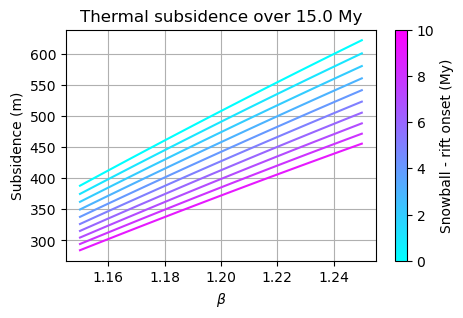

In [11]:
n_delays = 10
delays = np.linspace(0e6 * yr2sec, 10e6 * yr2sec, n_delays)
dur = 15e6 * yr2sec

beta = np.linspace(1.15, 1.25, 50)

c = plt.get_cmap('cool')
fig = plt.figure(figsize=(5, 3))
ax = plt.axes()

for ii, delay in enumerate(delays):
    mod1_subs = thermsub((delay+dur), beta) - thermsub(delay, beta)
    plt.plot(beta, mod1_subs, color=c(ii/n_delays))

ax.set_xlabel(r'$\beta$')
ax.set_ylabel('Subsidence (m)')
ax.set_title(f'Thermal subsidence over {dur/yr2sec/1e6} My')
fig.colorbar(mpl.cm.ScalarMappable(norm=plt.Normalize(np.min(delays)/yr2sec/1e6, 
                                                      np.max(delays)/yr2sec/1e6), cmap=c), 
             ax=ax,
             label='Snowball - rift onset (My)')

plt.grid()

plt.savefig(f'figures/Fransfontein_marinoan_subsidence_{dur/yr2sec/1e6}-My.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.savefig(f'figures/Fransfontein_marinoan_subsidence_{dur/yr2sec/1e6}-My.png', format='png', dpi=600, bbox_inches='tight')

plt.show()